### Python for Data Analysis
### chapter 5 pandas 시작하기

pandas (panel datas) 엑셀과 같이 2차원 표 형식의 데이터
- 데이터 획득, 정제, 분석, 전처리

In [1]:
# p181
import pandas as pd # 컨벤션, 별칭

In [2]:
# p182 pandas 자료 구조 : Series(열, 컬럼)
obj = pd.Series([4,7,-5,3])
obj # 인덱스 (색인)

0    4
1    7
2   -5
3    3
dtype: int64

In [3]:
obj2 = pd.Series(data=[1,2,3,4], index=['a','b','c','d'])
obj2 # 데이터와 인덱스로 구성된다.

a    1
b    2
c    3
d    4
dtype: int64

In [4]:
obj2['a'] # 원하는 데이터를 뽑을때(indexing)

1

In [5]:
obj2[['a','c']]

a    1
c    3
dtype: int64

In [6]:
# 조건부 검색 문법 : 데이터[조건] boolean mask indexing
cond = obj2 % 2 == 0 # 조건
obj2[cond]

b    2
d    4
dtype: int64

In [7]:
cond

a    False
b     True
c    False
d     True
dtype: bool

In [8]:
# p184
'a' in obj2, 'g' in obj2 #인덱스가 있는지 없는지 확인

(True, False)

In [9]:
# p187 DataFrmae 여러개의 컬럼이 있는 데이터
data = {'name' : ['kim','park'],'age' : [20,30]}
data, type(data), data['name'], data['age']

({'age': [20, 30], 'name': ['kim', 'park']}, dict, ['kim', 'park'], [20, 30])

데이터 프레임은 3가지 구성요소가 있다.
- 컬럼 : name, age
- 인덱스 : 0, 1, 2...
- 데이터 : values

In [10]:
frame = pd.DataFrame(data)
frame

,name,age
0,kim,20
1,park,30


In [11]:
frame.columns, frame.index, frame.values

(Index(['name', 'age'], dtype='object'),
 RangeIndex(start=0, stop=2, step=1),
 array([['kim', 20],
        ['park', 30]], dtype=object))

In [12]:
frame[['name','age']]

,name,age
0,kim,20
1,park,30


In [13]:
# 데이터를 추가하고 싶다.
frame2 = pd.concat((frame, frame), axis=0)
frame2

,name,age
0,kim,20
1,park,30
0,kim,20
1,park,30


In [14]:
# 데이터(인덱스, 컬럼)를 지우고 싶다.
frame2.drop(index=0)

,name,age
1,park,30
1,park,30


In [15]:
# 데이터(인덱스, 컬럼)를 지우고 싶다.
frame2.drop(columns='age')

,name
0,kim
1,park
0,kim
1,park


In [16]:
# p206 loc, iloc으로 선택하기 i(nteger) loc(ation)
frame.loc[0:2]

,name,age
0,kim,20
1,park,30


In [17]:
frame + frame

,name,age
0,kimkim,40
1,parkpark,60


In [18]:
frame

,name,age
0,kim,20
1,park,30


In [19]:
frame.sort_values('age', ascending=False) # 정렬

,name,age
1,park,30
0,kim,20


In [20]:
# p226 통계, 요약
frame.mean(), frame.sum(), frame.min(), frame.max(), frame.std()

(age    25.0
 dtype: float64, name    kimpark
 age          50
 dtype: object, name    kim
 age      20
 dtype: object, name    park
 age       30
 dtype: object, age    7.071068
 dtype: float64)

In [21]:
# p228 통계 요약
frame.describe().T # Transpose

,count,mean,std,min,25%,50%,75%,max
age,2.0,25.0,7.071068,20.0,22.5,25.0,27.5,30.0


# 공분산, 상관관계
- 상관관계 : 두 변수간의 상관의 정도
    1. 금값과 화폐가치 : 금값이 오르면 화폐가치는 떨어진다.
    2. 비트코인의 가격변화와 나의 오늘 기분 : 상관 없다 0
    3. 오늘의 날씨 불쾌지수와 나의 불쾌한 정도 : 양의 상관관계가 크다.

In [22]:
df = pd.read_csv('C:\/sample0.csv') # encoding='cp949'
df

,주가,외교관계(-10~10),실업률(0%~0.1%)
0,1000,0,0.03
1,1200,2,0.02
2,2000,2,0.01
3,5000,10,0.01
4,800,-3,0.03
5,700,-3,0.10


In [23]:
frame = pd.DataFrame(df)
frame.sort_values('주가') # 정렬
frame

,주가,외교관계(-10~10),실업률(0%~0.1%)
0,1000,0,0.03
1,1200,2,0.02
2,2000,2,0.01
3,5000,10,0.01
4,800,-3,0.03
5,700,-3,0.10


In [24]:
frame.describe().T

,count,mean,std,min,25%,50%,75%,max
주가,6.0,1783.333333,1642.457508,700.00,850.0000,1100.000,1800.00,5000.0
외교관계(-10~10),6.0,1.333333,4.802777,-3.00,-2.2500,1.000,2.00,10.0
실업률(0%~0.1%),6.0,0.033333,0.033862,0.01,0.0125,0.025,0.03,0.1


In [25]:
df.pct_change() # 퍼센트 변화

,주가,외교관계(-10~10),실업률(0%~0.1%)
0,NaN,NaN,NaN
1,0.200000,inf,-0.333333
2,0.666667,0.0,-0.500000
3,1.500000,4.0,0.000000
4,-0.840000,-1.3,2.000000
5,-0.125000,0.0,2.333333


In [26]:
df.corr() # correlation 상관관계

,주가,외교관계(-10~10),실업률(0%~0.1%)
주가,1.000000,0.954149,-0.498643
외교관계(-10~10),0.954149,1.000000,-0.610779
실업률(0%~0.1%),-0.498643,-0.610779,1.000000


티머니 대중교통 데이터

In [27]:
path = 'C:\sample2.xls'
df = pd.read_excel(path, sheet_name=1, encoding='cp949', thousands=',')
#pip install xlrd

In [28]:
df

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수,작업일시
0,2019-07,1호선,150,서울역,1735553,1647353,2019-08-03 11:47:06
1,2019-07,1호선,151,시청,779372,798955,2019-08-03 11:47:06
2,2019-07,1호선,152,종각,1371717,1335308,2019-08-03 11:47:06
3,2019-07,1호선,153,종로3가,1065085,1011157,2019-08-03 11:47:06
4,2019-07,1호선,154,종로5가,803024,806655,2019-08-03 11:47:06
5,2019-07,1호선,155,동대문,445092,491466,2019-08-03 11:47:06
6,2019-07,1호선,156,신설동,496506,486492,2019-08-03 11:47:06
7,2019-07,1호선,157,제기동,613105,623604,2019-08-03 11:47:06
8,2019-07,1호선,158,청량리(서울시립대입구),749947,768014,2019-08-03 11:47:06
9,2019-07,1호선,159,동묘앞,309041,322788,2019-08-03 11:47:06


In [29]:
df.shape

(597, 7)

In [30]:
# 데이터 프레임은 컬럼, 인덱스, data(values)로 구성됩니다.
df.values

array([['2019-07', '1호선', 150, ..., 1735553, 1647353,
        '2019-08-03 11:47:06'],
       ['2019-07', '1호선', 151, ..., 779372, 798955,
        '2019-08-03 11:47:06'],
       ['2019-07', '1호선', 152, ..., 1371717, 1335308,
        '2019-08-03 11:47:06'],
       ...,
       ['2019-07', '우이신설선', 4711, ..., 111976, 124467,
        '2019-08-03 11:47:06'],
       ['2019-07', '우이신설선', 4712, ..., 48962, 50565,
        '2019-08-03 11:47:06'],
       ['2019-07', '우이신설선', 4713, ..., 62642, 62804,
        '2019-08-03 11:47:06']], dtype=object)

In [31]:
df.head()

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수,작업일시
0,2019-07,1호선,150,서울역,1735553,1647353,2019-08-03 11:47:06
1,2019-07,1호선,151,시청,779372,798955,2019-08-03 11:47:06
2,2019-07,1호선,152,종각,1371717,1335308,2019-08-03 11:47:06
3,2019-07,1호선,153,종로3가,1065085,1011157,2019-08-03 11:47:06
4,2019-07,1호선,154,종로5가,803024,806655,2019-08-03 11:47:06


In [32]:
len(df)==len(set(df['역ID'])), df['역ID'].nunique() #유니크한 값이 몇개니?

(True, 597)

In [33]:
len(df)==len(set(df['지하철역'])),df['지하철역'].nunique()

(False, 509)

In [34]:
df = df.set_index('역ID')

In [35]:
df.head()

,사용월,호선명,지하철역,승차승객수,하차승객수,작업일시
역ID,,,,,,
150,2019-07,1호선,서울역,1735553,1647353,2019-08-03 11:47:06
151,2019-07,1호선,시청,779372,798955,2019-08-03 11:47:06
152,2019-07,1호선,종각,1371717,1335308,2019-08-03 11:47:06
153,2019-07,1호선,종로3가,1065085,1011157,2019-08-03 11:47:06
154,2019-07,1호선,종로5가,803024,806655,2019-08-03 11:47:06


In [36]:
df['호선명'].nunique()

25

In [37]:
df.describe()

,승차승객수,하차승객수
count,5.970000e+02,5.970000e+02
mean,3.840115e+05,3.825025e+05
std,3.885512e+05,3.954146e+05
min,1.000000e+00,0.000000e+00
25%,1.319120e+05,1.271390e+05
50%,2.799330e+05,2.735440e+05
75%,4.975740e+05,5.091430e+05
max,3.367923e+06,3.424515e+06


In [38]:
df.dtypes

사용월      object
호선명      object
지하철역     object
승차승객수     int64
하차승객수     int64
작업일시     object
dtype: object

In [39]:
# 문자를 숫자로 변환
pd.to_numeric(df['승차승객수'])

역ID
150     1735553
151      779372
152     1371717
153     1065085
154      803024
         ...   
4709     182467
4710     135797
4711     111976
4712      48962
4713      62642
Name: 승차승객수, Length: 597, dtype: int64

In [40]:
df.describe()

,승차승객수,하차승객수
count,5.970000e+02,5.970000e+02
mean,3.840115e+05,3.825025e+05
std,3.885512e+05,3.954146e+05
min,1.000000e+00,0.000000e+00
25%,1.319120e+05,1.271390e+05
50%,2.799330e+05,2.735440e+05
75%,4.975740e+05,5.091430e+05
max,3.367923e+06,3.424515e+06


In [41]:
df.sort_values(by='승차승객수', ascending=False).head(10)

,사용월,호선명,지하철역,승차승객수,하차승객수,작업일시
역ID,,,,,,
222,2019-07,2호선,강남,3367923,3424515,2019-08-03 11:47:06
216,2019-07,2호선,잠실(송파구청),2682716,2602686,2019-08-03 11:47:06
239,2019-07,2호선,홍대입구,2465797,2652758,2019-08-03 11:47:06
230,2019-07,2호선,신림,2197939,2131739,2019-08-03 11:47:06
232,2019-07,2호선,구로디지털단지,2004062,2008972,2019-08-03 11:47:06
219,2019-07,2호선,삼성(무역센터),2003803,2051373,2019-08-03 11:47:06
329,2019-07,3호선,고속터미널,1873471,1770288,2019-08-03 11:47:06
234,2019-07,2호선,신도림,1808744,1792357,2019-08-03 11:47:06
220,2019-07,2호선,선릉,1774307,1583854,2019-08-03 11:47:06


In [42]:
df['승하차차이'] = df['승차승객수']-df['하차승객수']

In [43]:
df.sort_values(by='승하차차이', ascending=False).head(10)

,사용월,호선명,지하철역,승차승객수,하차승객수,작업일시,승하차차이
역ID,,,,,,,
220,2019-07,2호선,선릉,1774307,1583854,2019-08-03 11:47:06,190453
1001,2019-07,경부선,서울역,219339,48890,2019-08-03 11:47:06,170449
330,2019-07,3호선,교대(법원.검찰청),470930,304745,2019-08-03 11:47:06,166185
433,2019-07,4호선,사당,907758,776475,2019-08-03 11:47:06,131283
4207,2019-07,공항철도 1호선,김포공항,343307,221905,2019-08-03 11:47:06,121402
2520,2019-07,5호선,신정(은행정),409949,288753,2019-08-03 11:47:06,121196
413,2019-07,4호선,쌍문,1012197,904988,2019-08-03 11:47:06,107209
2736,2019-07,7호선,고속터미널,644059,538342,2019-08-03 11:47:06,105717
2727,2019-07,7호선,군자(능동),468648,362953,2019-08-03 11:47:06,105695


In [44]:
# 조건부 검색 : 데이터[조건] 이대역 검색해봅시다. 
# 조건 =  지하철역 == '이대'
cond = df['지하철역'] == '이대'
cond.sum()

1

In [45]:
df[cond]

,사용월,호선명,지하철역,승차승객수,하차승객수,작업일시,승하차차이
역ID,,,,,,,
241,2019-07,2호선,이대,564521,593234,2019-08-03 11:47:06,-28713


In [46]:
df.corr()

,승차승객수,하차승객수,승하차차이
승차승객수,1.000000,0.994606,-0.114587
하차승객수,0.994606,1.000000,-0.217008
승하차차이,-0.114587,-0.217008,1.000000


In [47]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

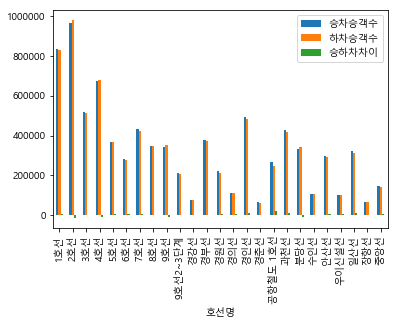

In [48]:
df.groupby(by='호선명').mean().plot.bar()

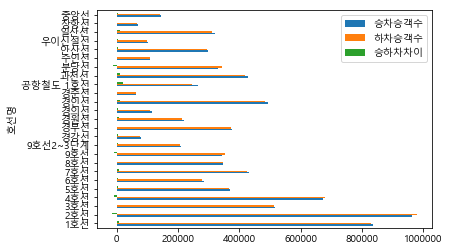

In [49]:
df.groupby(by='호선명').mean().plot.barh()

In [50]:
# 2호선 데이터만 추출해서 역별 승차 인원을 bar 그래프로 그려봅니다.
cond = df['호선명']=='2호선'
line2 = df[cond]
line2 = line2.set_index('지하철역')
line2 = line2['승차승객수']
cond.sum(), cond.mean()

(50, 0.08375209380234507)

In [51]:
line2

지하철역
시청              817999
을지로입구          1584598
을지로3가           736750
을지로4가           389994
동대문역사문화공원       572307
신당              465474
상왕십리            456788
왕십리(성동구청)       605382
한양대             273434
뚝섬              601108
성수              920845
건대입구           1352206
구의(광진구청)        760750
강변(동서울터미널)     1379013
잠실나루            508897
잠실(송파구청)       2682716
잠실새내            778317
종합운동장           432778
삼성(무역센터)       2003803
선릉             1774307
역삼             1550210
강남             3367923
교대(법원.검찰청)     1157487
서초              722761
방배              554157
사당             1351562
낙성대             932500
서울대입구(관악구청)    1671304
봉천              797621
신림             2197939
신대방             904253
구로디지털단지        2004062
대림(구로구청)        910899
신도림            1808744
문래              638999
영등포구청           693535
당산              699946
합정             1056923
홍대입구           2465797
신촌             1460374
이대              564521
아현              335766
충정로(경기대입구)      339754
용답    

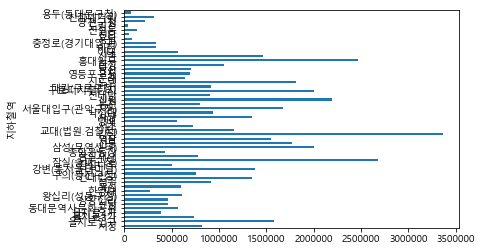

In [52]:
line2.plot.barh()

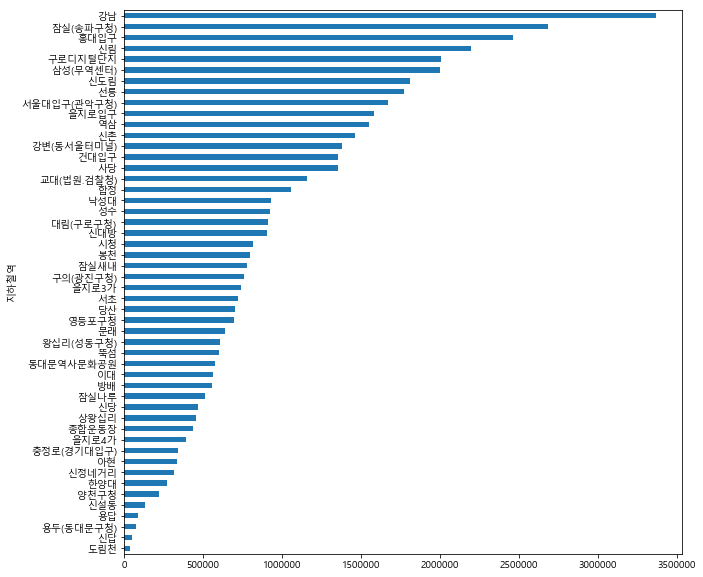

In [53]:
line2.sort_values().plot.barh(figsize=(10,10))

In [54]:
path = 'C:\sample2.xls'
df = pd.read_excel(path, sheet_name=2, encoding='cp949', thousands=',')
df.shape

(597, 9)

In [55]:
무임승차top10 = df.sort_values('무임승차', ascending=False).head(10)

In [56]:
무임승차top10 = 무임승차top10.set_index('지하철역')


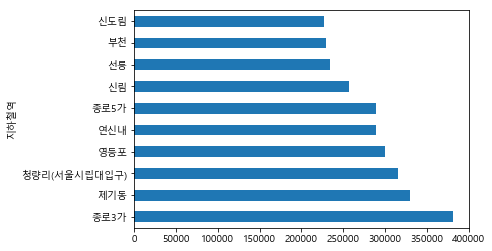

In [57]:
무임승차top10['무임승차'].plot.barh()

In [58]:
# 승하차 인원 더하자
df['유임'] = df['유임승차']+df['유임하차']
df['무임'] = df['무임승차']+df['무임하차']
df['총'] = df['유임']+df['무임']
df = df.drop(columns=['사용월','역ID','작업일시'])

In [59]:
df = df.set_index('지하철역')
df.head()

,호선명,유임승차,유임하차,무임승차,무임하차,유임,무임,총
지하철역,,,,,,,,
서울역,1호선,1515114,1433952,220439,213401,2949066,433840,3382906
시청,1호선,679661,700317,99711,98638,1379978,198349,1578327
종각,1호선,1208248,1181427,163469,153881,2389675,317350,2707025
종로3가,1호선,683505,653075,381580,358082,1336580,739662,2076242
종로5가,1호선,514309,530473,288715,276182,1044782,564897,1609679


# (유임/총) = 젊은이의 비율이 높은 역, (무임/총) 노인의 비율이 높은 역
# 유임/총 = 젊은이의 비율이 높은 역
# 1 - 유임/총 = 노인의 비율이 높은역

In [60]:
# 무임 승차 인원을 집계하는 표찰구가 없는 곳이 있다.
(df['무임'] == 0).sum()
df_valid = df[df['무임']>0]

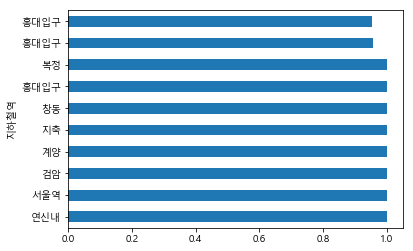

In [61]:
young_ratio = df['유임']/df['총']
young_ratio.sort_values(ascending=False).head(10).plot.barh()

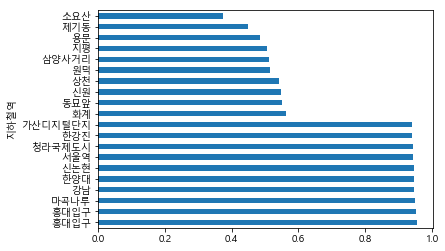

In [62]:
young_ratio = df_valid['유임']/df_valid['총']
young_10 = young_ratio.sort_values(ascending=False).head(10)
old_10 = young_ratio.sort_values(ascending=False).tail(10)
young_old_10 = pd.concat((young_10, old_10), axis=0)
young_old_10.plot.barh()

In [63]:
path = 'C:\sample2.xls'
df = pd.read_excel(path, sheet_name=3, header=0, encoding='cp949', thousands=',')
df.shape

(598, 53)

In [64]:
df = df.dropna() # 누락 데이터가 있는 행을 제거
df = df.drop(columns=['사용월','역ID','작업일시'])
df.shape

(597, 50)

In [65]:
len(df.columns)

50

In [66]:
hours = []
hours.append('호선명')
hours.append('지하철역')
for i in range(48//2):
    h = str((4+i)%24)
    hours.append(h+'승')
    hours.append(h+'하')
len(df.columns) == len(hours)

True

In [67]:
df.columns = hours

In [68]:
# 이대역 데이터만 가져오기, 조건부 검색, 데이터[조건]
ewha = df[df['지하철역']=='이대']
ewha

,호선명,지하철역,4승,4하,5승,5하,6승,6하,7승,7하,...,23승,23하,0승,0하,1승,1하,2승,2하,3승,3하
51,2호선,이대,51,1,3624,2024,7333,14967,20624,18898,...,8242,14135,1132,5026,0,76,0,0,0,0


In [69]:
df.columns

Index(['호선명', '지하철역', '4승', '4하', '5승', '5하', '6승', '6하', '7승', '7하', '8승',
       '8하', '9승', '9하', '10승', '10하', '11승', '11하', '12승', '12하', '13승',
       '13하', '14승', '14하', '15승', '15하', '16승', '16하', '17승', '17하', '18승',
       '18하', '19승', '19하', '20승', '20하', '21승', '21하', '22승', '22하', '23승',
       '23하', '0승', '0하', '1승', '1하', '2승', '2하', '3승', '3하'],
      dtype='object')

In [70]:
df.head()

,호선명,지하철역,4승,4하,5승,5하,6승,6하,7승,7하,...,23승,23하,0승,0하,1승,1하,2승,2하,3승,3하
1,1호선,서울역,1068,33,11965,9773,14890,53461,42023,112943,...,34257,18781,3430,6955,2,381,0,0,0,0
2,1호선,시청,67,2,2500,4357,3978,22598,8207,75860,...,14101,4291,874,1179,0,15,0,0,0,0
3,1호선,종각,80,0,4301,5761,4583,37826,7027,113270,...,46757,5527,3953,1389,1,10,0,0,0,0
4,1호선,종로3가,163,10,5186,3240,4701,16744,6333,34694,...,26688,5939,3016,2735,3,43,0,0,0,0
5,1호선,종로5가,69,4,2274,3743,3321,18403,6044,45220,...,9833,3616,731,1071,1,4,0,0,0,0


In [71]:
ewha.dtypes

호선명     object
지하철역    object
4승      object
4하      object
5승      object
5하      object
6승      object
6하      object
7승      object
7하      object
8승      object
8하      object
9승      object
9하      object
10승     object
10하     object
11승     object
11하     object
12승     object
12하     object
13승     object
13하     object
14승     object
14하     object
15승     object
15하     object
16승     object
16하     object
17승     object
17하     object
18승     object
18하     object
19승     object
19하     object
20승     object
20하     object
21승     object
21하     object
22승     object
22하     object
23승     object
23하     object
0승      object
0하      object
1승      object
1하      object
2승      object
2하      object
3승      object
3하      object
dtype: object

In [72]:
ewha = pd.to_numeric(ewha.iloc[0,2:]) # 문자를 숫자로 변환

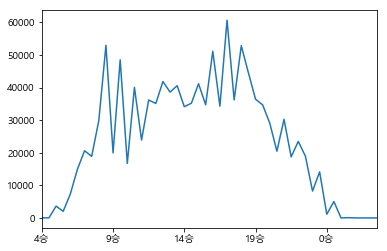

In [73]:
ewha.plot.line()

In [74]:
ewha.shape

(48,)

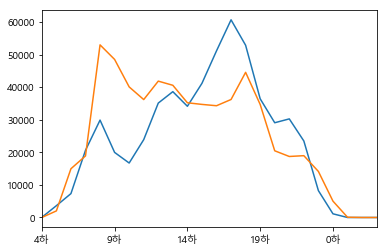

In [75]:
ewha.iloc[::2].plot.line() # 짝수
ewha.iloc[1::2].plot.line() # 홀수

In [76]:
df.isna().sum().sum() # 누락값은 없다

0

In [77]:
subway_str = df.iloc[:,:2]
subway_num = df.iloc[:,2:]
subway_num = subway_num.astype(int)

subway = pd.concat((subway_str, subway_num),axis=1)
subway = subway.set_index('지하철역')

In [78]:
subway.iloc[:,2:].sum(axis=1).sort_values()

지하철역
홍대입구              1
지축                1
검암                2
서울역               6
복정               10
             ...   
삼성(무역센터)    4055031
신림          4329337
홍대입구        5117185
잠실(송파구청)    5285321
강남          6792163
Length: 597, dtype: int64

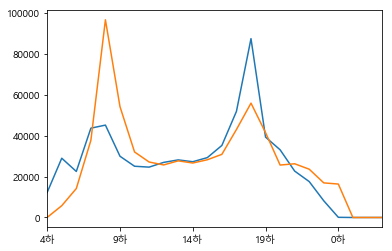

In [79]:
gangnam = subway[subway.index=='구로'].drop(columns='호선명')
gangnam.shape
# gangnam.iloc[0].plot.line() # 타는 사람, 내리는 사람
gangnam.iloc[0,0::2].plot.line()
gangnam.iloc[0,1::2].plot.line()

In [80]:
subway.index

Index(['서울역', '시청', '종각', '종로3가', '종로5가', '동대문', '신설동', '제기동', '청량리(서울시립대입구)',
       '동묘앞',
       ...
       '가오리', '화계', '삼양', '삼양사거리', '솔샘', '북한산보국문', '정릉', '성신여대입구(돈암)', '보문',
       '신설동'],
      dtype='object', name='지하철역', length=597)

In [81]:
for name in subway.index:
    if name.startswith('구로'):
        print(name)

구로디지털단지
구로


# 가장 많은 사람이 이용하는 역을 찾아서 역 이용 그래프를 그리세요.
# 출근 시간에 가장 많은 사람이 하차하는 역 10개를 찾아보세요.

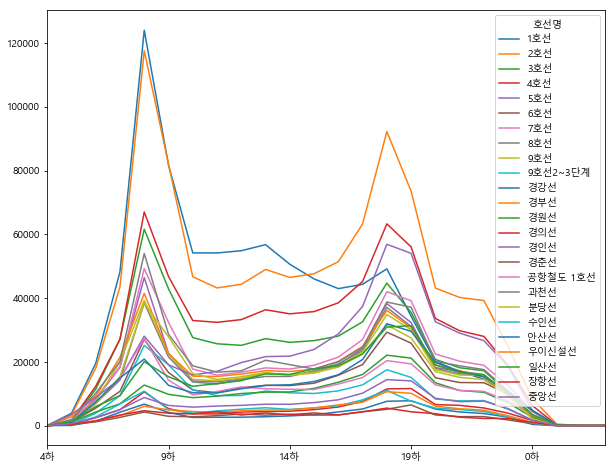

In [82]:
subway.groupby('호선명').mean().iloc[:,1::2].T.plot.line(figsize=(10,8))

In [83]:
# https://gist.github.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea
path = 'C:/Users/user/Desktop/movies.csv'
df = pd.read_csv(path, header=0)
df.shape

(77, 8)

In [84]:
# 데이터 정제 : 장르에 오타가 많아서 수정이 필요함
#               컬럼명에 특수 문자나 빈칸이 있으면 사용할 수 없음
df['Genre'] == df.Genre
set(df.Genre)

{'Action',
 'Animation',
 'Comdy',
 'Comedy',
 'Drama',
 'Fantasy',
 'Romance',
 'Romence',
 'comedy',
 'romance'}

In [85]:
df = df.replace('Comdy','Comedy', regex=True)
df = df.replace('comedy','Comedy', regex=True)
df = df.replace('Romence','Romance', regex=True)
df = df.replace('romance','Romance', regex=True)
set(df.Genre)

{'Action', 'Animation', 'Comedy', 'Drama', 'Fantasy', 'Romance'}

In [86]:
df.isna().sum().sum() # 항상 누락 체크할것

0

In [87]:
df.dtypes #데이터 타입 체크 : 혹시 숫자가 문자로 저장되어있을 수 있음

Film                  object
Genre                 object
Lead Studio           object
Audience score %       int64
Profitability        float64
Rotten Tomatoes %      int64
Worldwide Gross       object
Year                   int64
dtype: object

In [88]:
df['Worldwide Gross'].replace('$','',regex=True)

0      $41.94 
1      $19.62 
2      $26.66 
3      $43.04 
4     $219.37 
        ...   
72     $29.37 
73     $30.68 
74      $8.97 
75    $160.31 
76     $60.72 
Name: Worldwide Gross, Length: 77, dtype: object

In [89]:
df.describe()

,Audience score %,Profitability,Rotten Tomatoes %,Year
count,77.000000,77.000000,77.000000,77.000000
mean,63.727273,4.599483,46.701299,2009.077922
std,13.657113,8.031990,26.095001,1.354974
min,35.000000,0.000000,3.000000,2007.000000
25%,52.000000,1.751351,26.000000,2008.000000
50%,64.000000,2.642353,45.000000,2009.000000
75%,76.000000,5.103117,64.000000,2010.000000
max,89.000000,66.934000,96.000000,2011.000000


In [90]:
# 평점이 가장 높은 영화 10선을 선별해보세요. (평점으로 정렬, head(10))
df.sort_values(by='Audience score %', ascending=False)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
74,A Dangerous Method,Drama,Independent,89,0.448645,79,$8.97,2011
6,WALL-E,Animation,Disney,89,2.896019,96,$521.28,2008
22,Tangled,Animation,Disney,88,1.365692,89,$355.01,2010
39,My Week with Marilyn,Drama,The Weinstein Company,84,0.825800,83,$8.26,2011
72,Across the Universe,Romance,Independent,84,0.652603,54,$29.37,2007
43,Midnight in Paris,Romance,Sony,84,8.744706,93,$148.66,2011
54,Knocked Up,Comedy,Universal,83,6.636402,91,$219,2007
12,Twilight,Romance,Summit,82,10.180027,49,$376.66,2008
31,P.S. I Love You,Romance,Independent,82,5.103117,21,$153.09,2007
76,(500) Days of Summer,Comedy,Fox,81,8.096000,87,$60.72,2009


In [91]:
# 타이타닉 

In [92]:
# https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html
path = 'C:/Users/user/Downloads/titanic.csv'
df = pd.read_csv(path, header=0)
df.shape

(887, 8)

In [93]:
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [94]:
df.isna().sum().sum() # 누락 체크

0

In [95]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

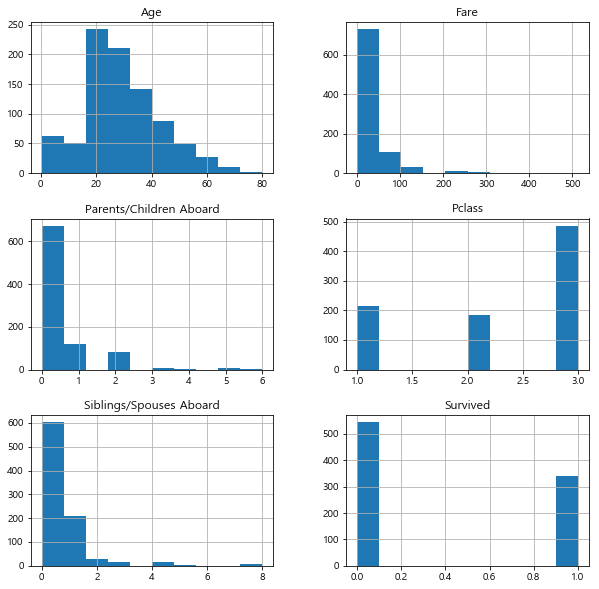

In [96]:
h = df.hist(figsize=(10,10))

In [97]:
df.groupby('Survived')['Age'].mean()

Survived
0    30.138532
1    28.408392
Name: Age, dtype: float64

In [98]:
# 나이별 생존률
df.groupby('Age')['Survived'].mean()

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 89, dtype: float64

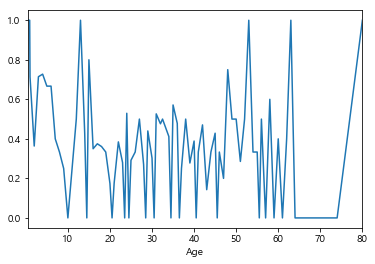

In [99]:
# df.groupby('Age')['Survived'].mean().plot.line()
df.groupby('Age')['Survived'].mean().plot.line()

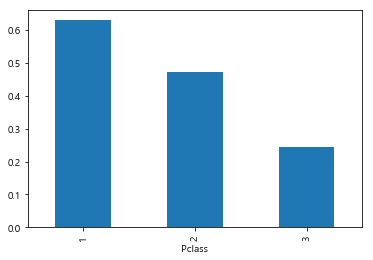

In [100]:
#
df.groupby('Pclass')['Survived'].mean().plot.bar()

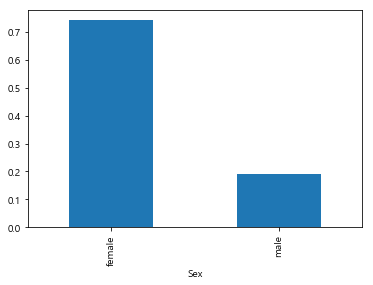

In [101]:
df.groupby('Sex')['Survived'].mean().plot.bar()

In [102]:
df.corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000


In [103]:
titanic = df.set_index('Name')

In [104]:
# cond = titanic['Sex']=='male'
titanic.loc[:,'Sex'][titanic['Sex'] == 'male'] = 0
titanic.loc[:,'Sex'][titanic['Sex'] == 'female'] = 1
titanic['Sex'] = pd.to_numeric(titanic['Sex']) # 성별을 숫자로 변환

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [105]:
titanic

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Name,,,,,,,
Mr. Owen Harris Braund,0,3,0,22.0,1,0,7.2500
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,1,1,38.0,1,0,71.2833
Miss. Laina Heikkinen,1,3,1,26.0,0,0,7.9250
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,1,35.0,1,0,53.1000
Mr. William Henry Allen,0,3,0,35.0,0,0,8.0500
Mr. James Moran,0,3,0,27.0,0,0,8.4583
Mr. Timothy J McCarthy,0,1,0,54.0,0,0,51.8625
Master. Gosta Leonard Palsson,0,3,0,2.0,3,1,21.0750
Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,1,3,1,27.0,0,2,11.1333


In [106]:
titanic.dtypes

Survived                     int64
Pclass                       int64
Sex                          int64
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [107]:
x = titanic.drop(columns='Survived')
y = titanic['Survived']

In [108]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4).fit(x,y)
model.score(x,y)

0.8489289740698985

In [114]:
from sklearn.tree import export_graphviz
# 결정트리 모델을 파일로 저장하기
export_graphviz(model,out_file='tree.dot',class_names=['Die','Survive'],
               feature_names=titanic.columns[1:],impurity=False, filled=True)

In [117]:
import os
os.environ['Path'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

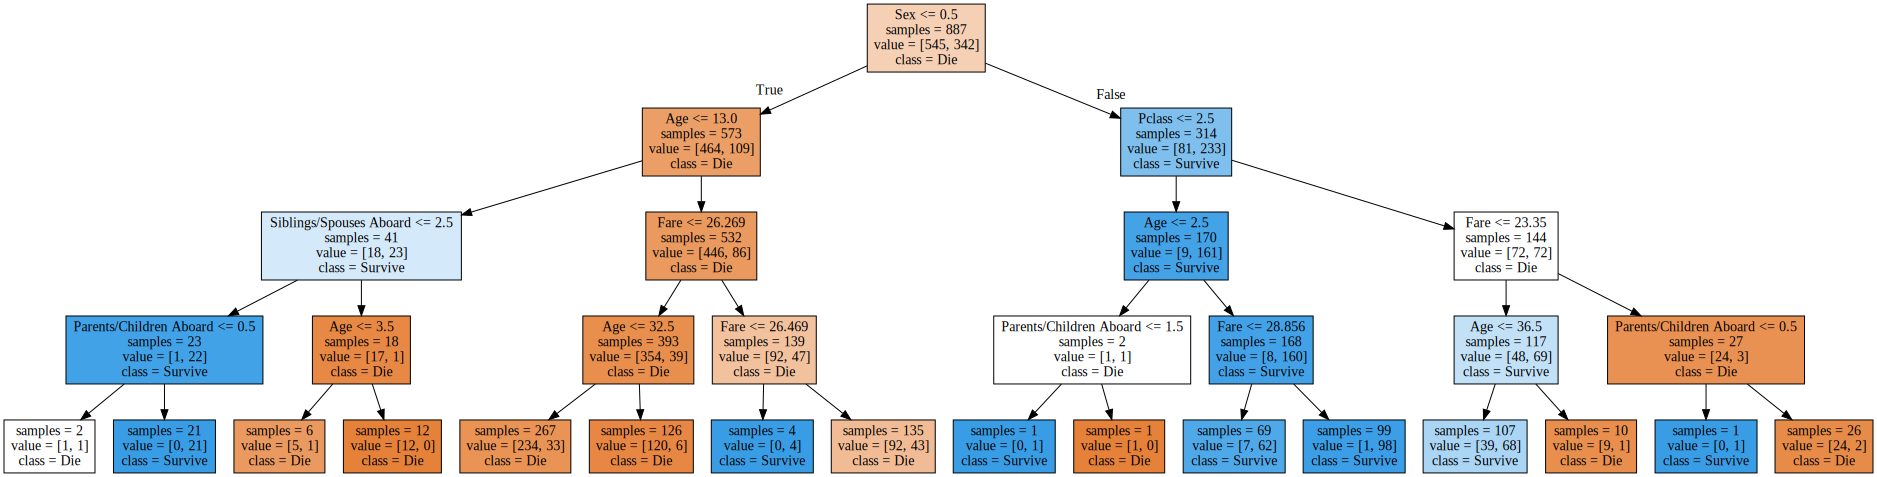

In [118]:
import graphviz
import pylab
with open('tree.dot') as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
display(g)